In [59]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import contextlib
import io
from Database import COMP_DB, check_sanity
from Flash import Stream, UOP, Q_Flash, PENG_ROBINSON
# from Utility 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
print(COMP_DB)

{'critical':              omega          bp            pc          tc       vc          mw
component                                                                    
benzene    0.21500  353.229014  4.924389e+06  562.088022  0.25999   78.110001
toluene    0.25960  383.789011  4.100039e+06  591.789011  0.31600   92.140800
o-xylene   0.30230  417.565012  3.732809e+06  630.362009  0.36912  106.166000
m-xylene   0.32600  412.255015  3.541119e+06  617.039011  0.37573  106.166000
p-xylene   0.32589  411.500010  3.510789e+06  616.250010  0.37906  106.166000
...            ...         ...           ...         ...      ...         ...
n-c15      0.70599  543.758005  1.516810e+06  706.990000  0.87998  212.410004
n-c14      0.67900  526.648020  1.620180e+06  693.990000  0.82999  198.380005
n-c13      0.62300  508.569010  1.723530e+06  675.789011  0.77999  184.367004
n-c12      0.56199  489.418009  1.829920e+06  658.289011  0.71297  170.339005
n-c11      0.53500  469.030009  1.964930e+06  638.2

In [61]:

# Component in Scope for the calculation
comp1= {'benzene': 0.2,
      'toluene': 0.3,
      'o-xylene': 0.5}
comp2= {'n-butane': 0.15,
      'n-pentane': 0.25,
      'n-hexane': 0.35,
      'n-c15':0.25}
# check for consistency of the component list
check_sanity(comp1)
check_sanity(comp2)
    


Sanity check completed successfully.
Sanity check completed successfully.


In [62]:
# create a stream from the component list
s1 = Stream(name="s1", composition=comp1, temperature=367, pressure=101325, flowrate=1000)
s2 = Stream(name="s2",composition=comp2, temperature=400, pressure=101325, flowrate=1000)

### Adiabatic Flash

In [63]:
# Wrap the streams with EOS solver
s1 = PENG_ROBINSON(s1)
s2 = PENG_ROBINSON(s2)

##### Parameters Calculation:
Temperature: 367, Pressure: 101325
Tr: [0.65292265 0.62015346 0.58220514], alpha: [1.28408468 1.34751617 1.42425061], a: [2.60383955 3.63784361 4.79175859], b: [7.38314817e-05 9.33616470e-05 1.09230481e-04]
#####
Two phase
Calculated beta:-1.208284270547264
Willson: xi:[0.2 0.3 0.5], yi:[0.49062757 0.31206909 0.19730334], K: [1.5148777  0.64236982 0.24368009], beta:0
Two phase
Calculated beta:-1.208284270547264
Willson: xi:[0.2 0.3 0.5], yi:[0.49062757 0.31206909 0.19730334], K: [1.5148777  0.64236982 0.24368009], beta:0
A: 0.04305471094168558, B: 0.003234111815677049, a_mix: 3.9559995567595756, b_mix: 9.739003077466377e-05
Z roots: [0.95877923 0.03404195 0.00394472]
##### Z-factor Calculation:
Z_l: 0.003944715871011487, Z_v: 0.9587792254600503
#####
##### Fugacity Coefficient Calculation:
Z: 0.003944715871011487, x_or_y: [0.2 0.3 0.5], A: 0.04305471094168558, B: 0.003234111815677049, a_mix: 3.9559995567595756, b_mix: 9.739003077466377e-05
ln_phi: [ 0.3739

In [64]:
# get the simple flash result
s1.basic_info()





### Post Flash Results for Stream:s1 ###
T:, 367 K, P: 101325 Pa
VF: 0, xi: [0.2 0.3 0.5], yi: [0. 0. 0.]
Z_l: 0.0039, Z_v: 0.966, phi_l: [1.45 0.6  0.22], phi_v: [0.97 0.96 0.95]
h_l: -35755.25 J/mol, h_v: 0 J/mol, h: -35755.25 J/mol
###


### TXY Plot

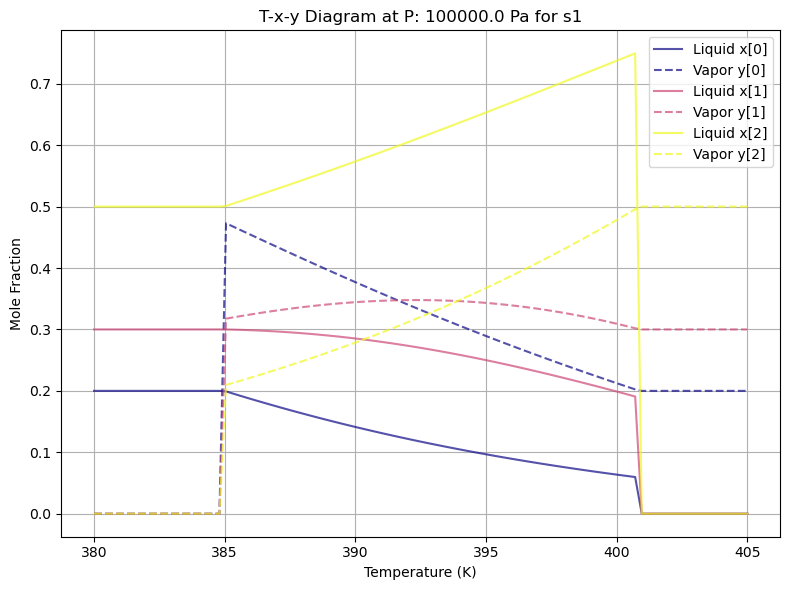

In [65]:
from Utility import plot_TXY
# TXY plot for s2
with contextlib.redirect_stdout(io.StringIO()):
    plot_TXY(s1, P=1e5, T_min=380, T_max=405, T_step=100)


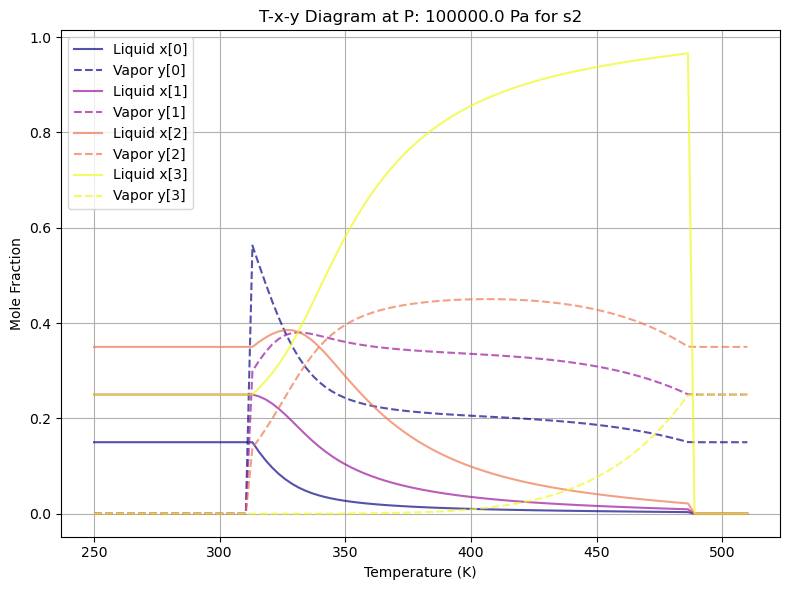

In [66]:
from Utility import plot_TXY
# TXY plot for s2

with contextlib.redirect_stdout(io.StringIO()):
    plot_TXY(s2, P=1e5, T_min=250, T_max=510, T_step=100)

### PXY Plot

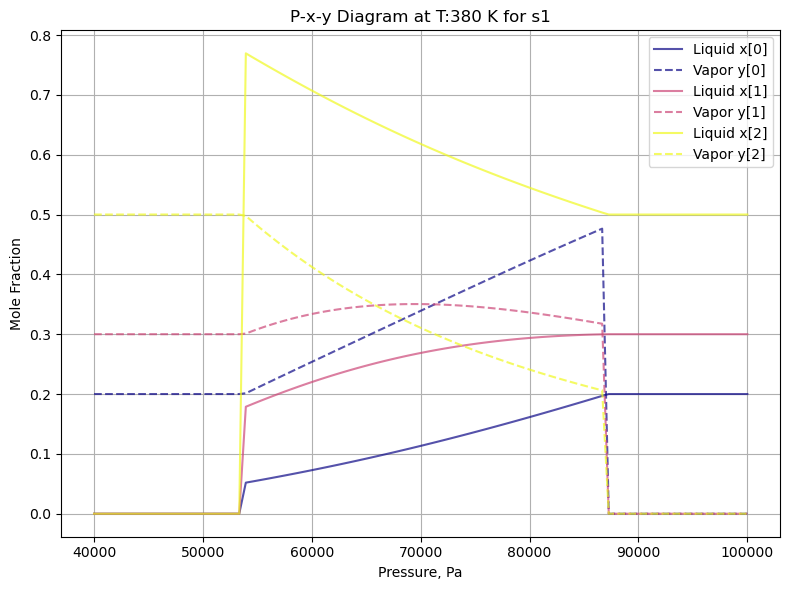

In [67]:
from Utility import plot_PXY
# PXY plot for s1
with contextlib.redirect_stdout(io.StringIO()):
    plot_PXY(s1, T=380, P_min=0.4e5, P_max=1e5, P_step=100)


## Non-Adiabatic Flash

##### Parameters Calculation:
Temperature: 350.0, Pressure: 101325
Tr: [0.62267827 0.591427   0.55523651], alpha: [1.3140309  1.38013858 1.45929967], a: [2.66456386 3.72591323 4.9096779 ], b: [7.38314817e-05 9.33616470e-05 1.09230481e-04]
#####
Single phase: Liquid
A: 0.04848836578308326, B: 0.0033911972467242195, a_mix: 4.052071162533681, b_mix: 9.739003077466377e-05
Z roots: [0.95305294 0.03949381 0.00406205]
##### Z-factor Calculation:
Z_l: 0.004062051984786859, Z_v: 0.9530529381723452
#####
##### Fugacity Coefficient Calculation:
Z: 0.004062051984786859, x_or_y: [0.2, 0.3, 0.5], A: 0.04848836578308326, B: 0.0033911972467242195, a_mix: 4.052071162533681, b_mix: 9.739003077466377e-05
ln_phi: [-0.10953747 -1.05683571 -2.1499582 ]
phi: [0.89624859 0.34755383 0.11648903]
#####
A: 0.04848836578308326, B: 0.0033911972467242195, a_mix: 4.052071162533681, b_mix: 9.739003077466377e-05
Z roots: [0.95305294 0.03949381 0.00406205]
##### Z-factor Calculation:
Z_l: 0.004062051984786859, Z_v: 0.95

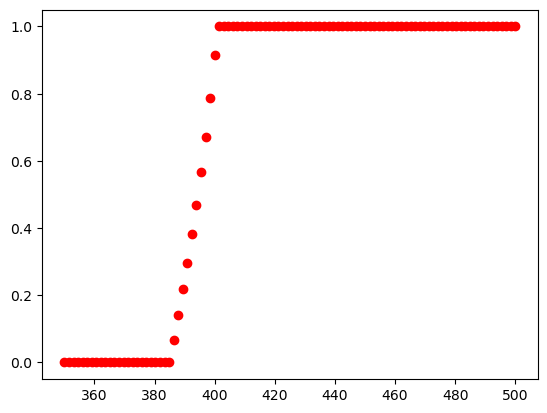

In [68]:
import matplotlib.pyplot as plt
for t in np.linspace(350,500,100):
    s1.T = t
    s1.P = 1e5
    plt.plot( t, s1.vf,'ro')


In [72]:
from UnitOperation import Heater
with contextlib.redirect_stdout(io.StringIO()):
    # Give some duty to the stream
    h1 = Heater(s1, dP=0.1e5, dQ=1e5)
h1.basic_info()


### Heater Unit Operation ###
Feed Stream: s1
Outlet Stream: s1
Heat Duty: 100.0 kJ/h
Pressure Drop: -10000.0 Pa
Temperature Change: 53.53 K
#############################


In [73]:
# product Stream of s1
s3 = h1.ps

In [75]:
# Let say we want to increast the temperature and want to know the duty required
# and ofcourse the new stream phase composition and vapor fraction
with contextlib.redirect_stdout(io.StringIO()):
    h2 = Heater(s3, dP=0.7e5, dT=20)
    
h2.basic_info()

### Heater Unit Operation ###
Feed Stream: s1
Outlet Stream: s1
Heat Duty: 144.54 kJ/h
Pressure Drop: -70000.0 Pa
Temperature Change: 20.0 K
#############################
